# Buisness Objective

- Use a classification model inorder to predict if a credit card transaction is fraudulent or not
- Use shap to explain your models

# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

from collections import Counter

#ignoring all warnings
import warnings
warnings.filterwarnings("ignore")

import shap

In [2]:
df = pd.read_csv("fraud_data.csv")

In [3]:
pd.set_option('display.max_columns', None)

df.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2994681,0,242834,25.000,H,9803,583.0,150.0,visa,226.0,credit,269.0,87.0,NaN,NaN,yahoo.com,NaN,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,7.791666,0.791666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,15.0,136.0,0.0,0.0,0.0,0.0,1822.0,47.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,15951.99023,198853.7656,0.0,0.0,0.0,915.0,5975.0,1320.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82050.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,NaN,529.0,178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10.12,firefox 56.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,rv:56.0
1,3557242,0,15123000,117.000,W,7919,19

Categorical Features – Transaction

ProductCD – Product code card1 - card6 : payment card information, such as card type, card category, issue bank, country, etc. addr1, addr2 P_emaildomain – Purchaser R_emaildomain- Recipient M1 - M9 – Match between names on card and address etc.

Categorical Features - Identity DeviceType DeviceInfo id_12 - id_38 customer identity variables The TransactionDT feature is a timedelta from a given reference datetime (not an actual timestamp buth rather a duration).

Outcome/Target Variable – isFraud

whether transaction is fraud or not

# EDA and Data Preparation

In [4]:
missing_percentage = df.isnull().mean() * 100

# Eliminate automatically variables with more than 20% of missingness
df = df[df.columns[missing_percentage < 20]]

In [5]:
# displaying the remaining columns with missing values
missing_cols=df.columns[df.isnull().mean() > 0]
print(missing_cols)

Index(['card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2',
       'P_emaildomain', 'D1', 'D10',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=162)


In [6]:
# fill numeric columns' missing values with their mean value

df_single= df
cols= df_single.columns
num_cols = df_single.select_dtypes(include=np.number).columns
df_single.loc[:,num_cols]=df_single.loc[:,num_cols].fillna(df_single.loc[:,num_cols].mean())
print(num_cols)
print(df_single.loc[:,num_cols].mean())

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1',
       'card2', 'card3', 'card5', 'addr1', 'addr2',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=178)
TransactionID     3.282166e+06
isFraud           3.395198e-02
TransactionDT     7.368220e+06
TransactionAmt    1.341429e+02
card1             9.910366e+03
                      ...     
V317              2.621775e+02
V318              1.759274e+02
V319              1.740723e+01
V320              4.214813e+01
V321              2.803849e+01
Length: 178, dtype: float64


In [7]:
# fill categorical columns' missing values with their mode entry

cat_cols= list(set(cols) - set(num_cols))
df_single.loc[:,cat_cols] = df_single.loc[:,cat_cols].fillna(df.loc[:,cat_cols].mode().iloc[0])
train_cols = df_single.columns
print(cat_cols)
print(df_single.loc[:,cat_cols].mode().iloc[0])

['P_emaildomain', 'card6', 'ProductCD', 'card4']
P_emaildomain    gmail.com
card6                debit
ProductCD                W
card4                 visa
Name: 0, dtype: object


In [8]:
df_single.columns[df_single.isnull().mean() > 0] # select those variables with missing values

Index([], dtype='object')

In [9]:
# describe object features
df.describe(include='object')

,ProductCD,card4,card6,P_emaildomain
count,59054,59054,59054,59054
unique,5,4,4,59
top,W,visa,debit,gmail.com
freq,43840,38505,44286,32327


In [10]:
# describe numeric features
df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
count,5.905400e+04,59054.000000,5.905400e+04,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.0,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000
mean,3.282166e+06,0.033952,7.368220e+06,134.142888,9910.366360,362.438054,153.264551,199.104231,290.653939,86.806616,13.213212,14.233447,0.005571,3.673773,5.480120,8.574305,2.476784,4.551275,4.422173,4.642226,9.597893,3.551428,31.658753,7.955397,94.243548,124.267325,163.966616,0.559650,0.597624,0.999398,0.124619,0.125551,0.137374,0.138830,0.814731,0.845542,0.133239,0.135394,1.035702,1.058825,0.977247,0.987245,0.000621,0.000679,0.383778,0.402532,0.143839,0.145334,0.133375,0.141354,0.577891,0.619606,1.069064,1.121270,0.130224,0.134370,0.135635,0.144103,0.830144,0.866973,0.132482,0.143577,0.999533,0.981138,0.998521,0.000467,0.387344,0.405077,0.142760,0.147354,0.142585,0.154809,0.544799,0.587851,1.086124,1.142315,0.138761,0.145570,0.154416,0.842309,0.880149,0.139120,0.151600,1.064179,1.098444,0.999081,0.000779,0.397033,0.416123,0.151521,0.155714,

In [11]:
# one hot encode

# these are the columns I want to use one hot encoding on
columns_to_encode = ['ProductCD', 'card4', 'card6']

# Perform one-hot encoding for the specified columns
df_encoded = pd.get_dummies(df, columns=columns_to_encode)

# label encode

# this is the column I want to label encode
column_to_encode = ['P_emaildomain']

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the specified columns
for column in column_to_encode:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])


In [12]:
data = pd.DataFrame(data=df_encoded)

print(data.shape)

(59054, 192)


# Removing outlier

<Axes: xlabel='addr2', ylabel='Density'>

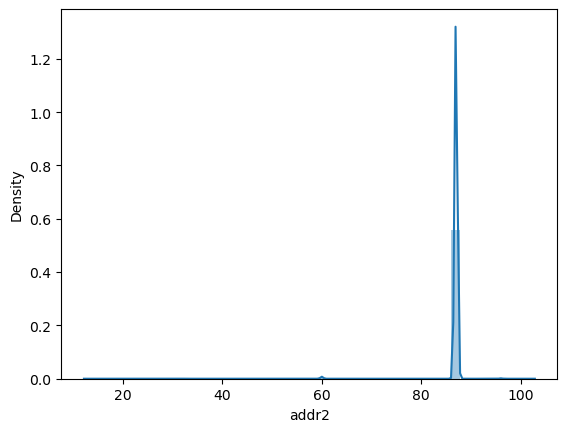

In [13]:
sns.distplot(data['addr2'])

# I decided to check this column for a start because it has a large standard deviation

10


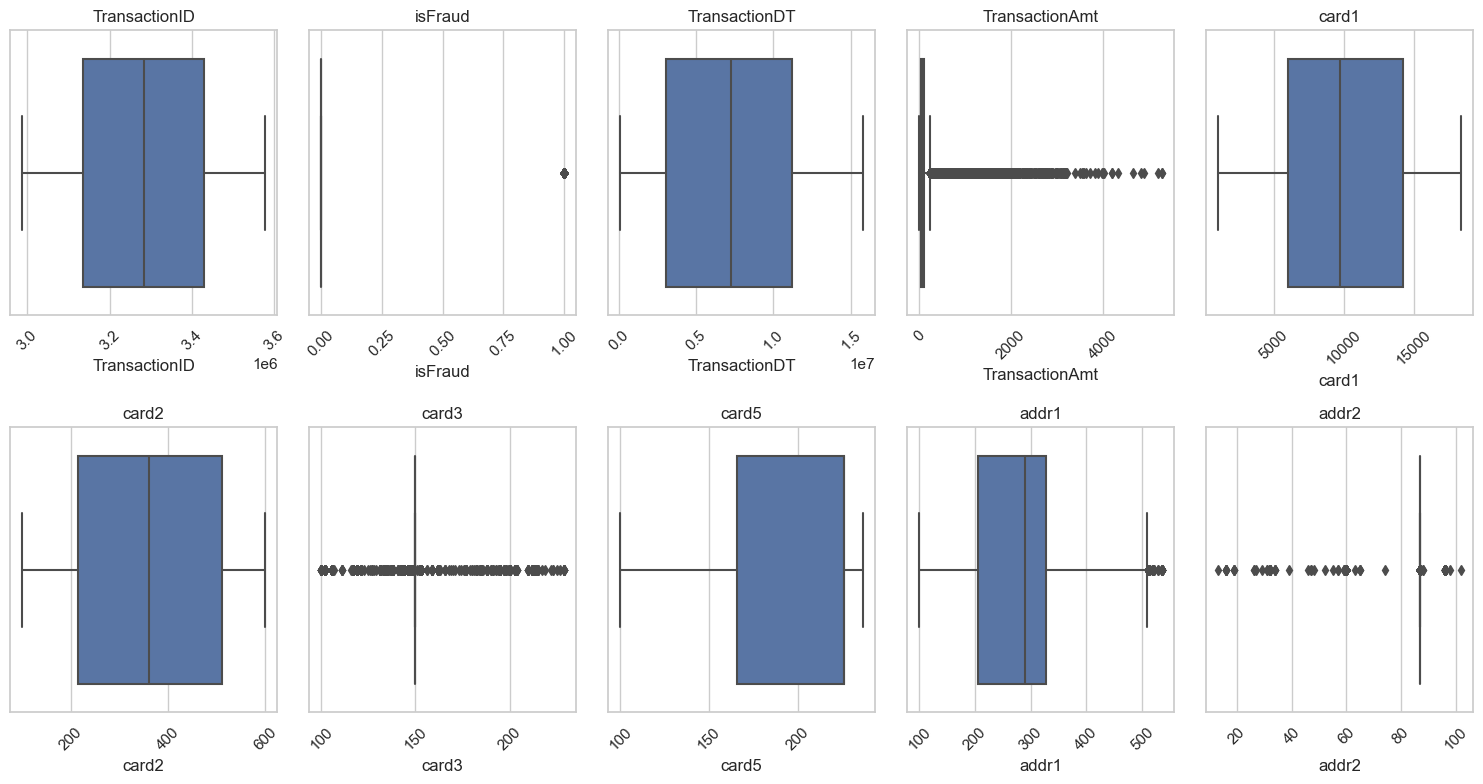

In [14]:
numerical_columns = data.select_dtypes(include=['number'])

# Set the style of seaborn
sns.set(style="whitegrid")

# Specify the maximum number of boxplots to display
max_boxplots = 10

# Determine the number of rows and columns for the grid
num_rows = 2
num_cols = 5

# Calculate the total number of subplots needed
total_plots = min(max_boxplots, len(numerical_columns.columns))
print(total_plots)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 8))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Iterate over a subset of numerical columns and create boxplots
for i, column in enumerate(numerical_columns.columns[:total_plots]):
    sns.boxplot(x=numerical_columns[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].tick_params(axis='x', labelrotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

Remark: I am realizing that the outliers here are disordered, the scaling of each column is different. But this doesnot have an impact on the tree algorithm we are using since these algorithms are not sensitive to scaling. 
so to handle outliers we will use robust scaling.

# Scaling

In [15]:
scaler = RobustScaler()
new_data = scaler.fit_transform(data)
new_data = pd.DataFrame(new_data, columns=data.columns)

# Balance dataset?

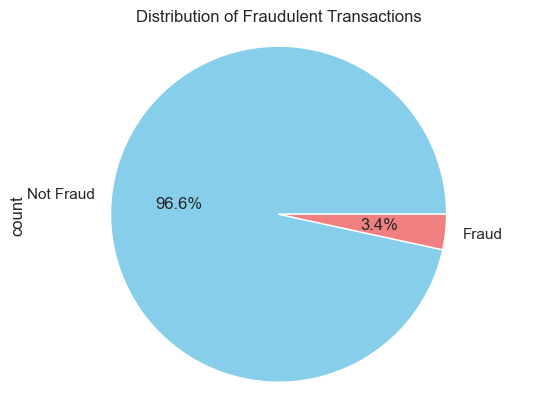

In [16]:
# Assuming 'new_data' is your DataFrame
category_counts = new_data['isFraud'].value_counts()

# Create the pie chart
category_counts.plot(kind='pie', labels=['Not Fraud', 'Fraud'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])

# Add a title
plt.title('Distribution of Fraudulent Transactions')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()

In [17]:
from sklearn.utils import resample

# Assuming you have the entire dataset in a DataFrame called 'data'
# Separate the majority and minority classes
majority_class = new_data[new_data['isFraud'] == 0]  # Assuming the majority class is labeled as 0
minority_class = new_data[new_data['isFraud'] == 1]  # Assuming the minority class is labeled as 1

# Upsample the minority class to match the majority class
minority_upsampled = resample(minority_class, 
                              replace=True,     # Sample with replacement
                              n_samples=len(majority_class) if len(minority_class) > 0 else 1,   # Match the number of samples in the majority class, or set to 1 if the minority class is empty
                              random_state=42)  # Set a random seed for reproducibility

# Combine the upsampled minority class with the majority class
resampled_data = pd.concat([majority_class, minority_upsampled])

# Separate the features (X) and labels (y) from the resampled data
X_resampled = resampled_data.drop('isFraud', axis=1)
y_resampled = resampled_data['isFraud']

# Print the resampled data
print(X_resampled.head())
print(y_resampled.head())

   TransactionID  TransactionDT  TransactionAmt     card1     card2  card3  \
0      -0.977648      -0.862909       -0.580918  0.006582  0.747475    0.0   
1       0.936144       0.959533        0.661485 -0.223062 -0.562290    0.0   
2       0.154476       0.133513        0.077731  0.369210  0.468013   35.0   
3      -0.555468      -0.573256        4.483228  0.312896  0.629630    0.0   
4       0.604558       0.604791       -0.487063 -0.091053  0.309764    0.0   

      card5     addr1  addr2  P_emaildomain   C1   C2   C3   C4   C5   C6  \
0  0.000000 -0.177491    0.0      12.333333  0.0  0.0  0.0  0.0  0.0  0.0   
1 -1.000000 -0.898803    0.0       0.000000  0.0  1.5  0.0  0.0  0.0  0.0   
2 -0.033333 -0.054540  -27.0       1.000000  0.0  1.0  0.0  1.0  0.0  0.0   
3 -0.516667  1.232345    0.0      -5.000000  0.0  0.0  0.0  1.0  0.0  0.0   
4  0.000000 -0.218475    0.0      12.333333  1.0  1.0  0.0  0.0  3.0  3.0   

    C7   C8   C9  C10  C11  C12       C13  C14     D1       D10     

In [18]:
resampled_data.shape

(114098, 192)

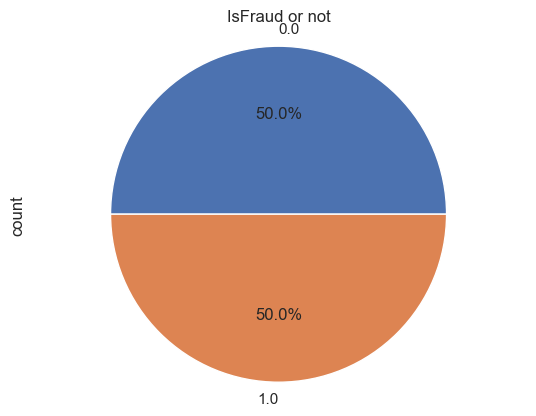

In [19]:
# Calculate the frequency of each category
category_counts = resampled_data['isFraud'].value_counts()

# Create the pie chart
category_counts.plot(kind='pie', labels=category_counts.index, autopct='%1.1f%%')

# Add a title
plt.title('IsFraud or not')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()

# Train Explain Split

The aim here is to split the data in 2 part. One for the models and another one for explainable analysis with shap

In [20]:
# set x and y variables
y = resampled_data['isFraud']
x= resampled_data.loc[:, resampled_data.columns != 'isFraud']


from sklearn.model_selection import train_test_split

# Split randomly into 50% Modeling data and 50% for Explainable AI with SHAP
x_model, x_eai, y_model, y_eau = train_test_split(x, y, test_size = 0.5, random_state = 123)

# Train Test Split for the Model Building and Evaluation

In [21]:
# Split randomly into 80% train data and 20% test data
xTrain, xTest, yTrain, yTest = train_test_split(x_model, y_model, test_size = 0.2, random_state = 123)

# Build Decision Tree Model

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [24]:
base_model = DecisionTreeClassifier()

In [25]:
#Using max_depth, criterion will suffice for DT Models, rest all will remain constant 
parameters = {'max_depth' : (3,5,7,9,10,15,20,25)
              , 'criterion' : ('gini', 'entropy')
              , 'max_features' : ('auto', 'sqrt', 'log2')
              , 'min_samples_split' : (2,4,6)
             }

In [26]:
DT_grid  = RandomizedSearchCV(base_model, param_distributions = parameters, cv = 5, verbose = True) 

In [24]:
# base_model = DecisionTreeClassifier()

# # Specify the hyperparameter grid for RandomizedSearchCV
# param_dist = {'max_depth' : (3,5,7,9,10,15,20,25)
#               , 'criterion' : ('gini', 'entropy')
#               , 'max_features' : ('auto', 'sqrt', 'log2')
#               , 'min_samples_split' : (2,4,6)
#              }

# # Initialize RandomizedSearchCV
# random_search = RandomizedSearchCV(base_model, param_distributions=param_dist, n_iter=5, cv=5, random_state=42)

# # Fit RandomizedSearchCV to find the best hyperparameters
# random_search.fit(xTrain, yTrain)

# # Get the best model from RandomizedSearchCV
# best_model = random_search.best_estimator_

# # Initialize TreeExplainer with the best model
# explainer = shap.TreeExplainer(best_model)

# # Get SHAP values
# shap_values = explainer.shap_values(x_eai)

In [27]:
DT_grid.fit(xTrain, yTrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 5, 7, 9, 10, 15, 20,
                                                      25),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6)},
                   verbose=True)

In [28]:
best_model = DT_grid.best_estimator_

In [29]:
#Re Build Model with Best Estimators
DT_Model = DecisionTreeClassifier(criterion='entropy',
                       max_depth=20, max_features='sqrt')

In [30]:
best_model.fit(xTrain, yTrain)

DecisionTreeClassifier(criterion='entropy', max_depth=25, max_features='log2',
                       min_samples_split=4)

In [31]:
predictions = best_model.predict(xTest)
predictions_train = best_model.predict(xTrain)

train_accuracy = best_model.score(xTrain, yTrain)
test_accuracy = best_model.score(xTest, yTest)

In [32]:
print(f'Train Accuracy: {train_accuracy:.3f}')
print(f'Test Accuracy: {test_accuracy:.3f}')

Train Accuracy: 0.970
Test Accuracy: 0.944


In [33]:
#AUC 
auc = roc_auc_score(yTrain, predictions_train)
print(f'AUC: {auc:.4f}')

AUC: 0.9704


# Explain predictions with SHAP

In [34]:
#creating an explainer for our model

explainer = shap.TreeExplainer(best_model)

In [35]:
#Finding the shap values using the explainer

shap_values = explainer.shap_values(x_eai)
print(shap_values)

[array([[-0.03810679,  0.00904487, -0.07065576, ...,  0.00891157,
         0.00268333,  0.        ],
       [ 0.00823782,  0.0050262 ,  0.01155465, ...,  0.00252304,
         0.00240625,  0.        ],
       [ 0.00960283, -0.01569132,  0.05029114, ...,  0.00583894,
         0.00292721,  0.        ],
       ...,
       [ 0.0437803 ,  0.00555393,  0.01635334, ..., -0.00638648,
        -0.00125696,  0.        ],
       [-0.00415732, -0.00241247, -0.00373503, ...,  0.0017984 ,
         0.00286404,  0.        ],
       [-0.00404732,  0.02704773,  0.01258222, ...,  0.07471391,
         0.00356827,  0.        ]]), array([[ 0.03810679, -0.00904487,  0.07065576, ..., -0.00891157,
        -0.00268333,  0.        ],
       [-0.00823782, -0.0050262 , -0.01155465, ..., -0.00252304,
        -0.00240625,  0.        ],
       [-0.00960283,  0.01569132, -0.05029114, ..., -0.00583894,
        -0.00292721,  0.        ],
       ...,
       [-0.0437803 , -0.00555393, -0.01635334, ...,  0.00638648,
        

In [36]:
""" Expected/ base/ reference value, this is the value that would be 
predicted if we didn't know any features of the current output 
"""

print('Expected value:', explainer.expected_value )

Expected value: [0.49941936 0.50058064]


In [37]:
# # Convert the list to a NumPy array
# shap_values_array = np.array(shap_values)

# # Reshape the array
# shap_values_reshaped = shap_values_array.reshape((3, 3))

# # Create a DataFrame
# shap_values_df = pd.DataFrame(shap_values_class_2d)

# pd.DataFrame(shap_values_df).head()

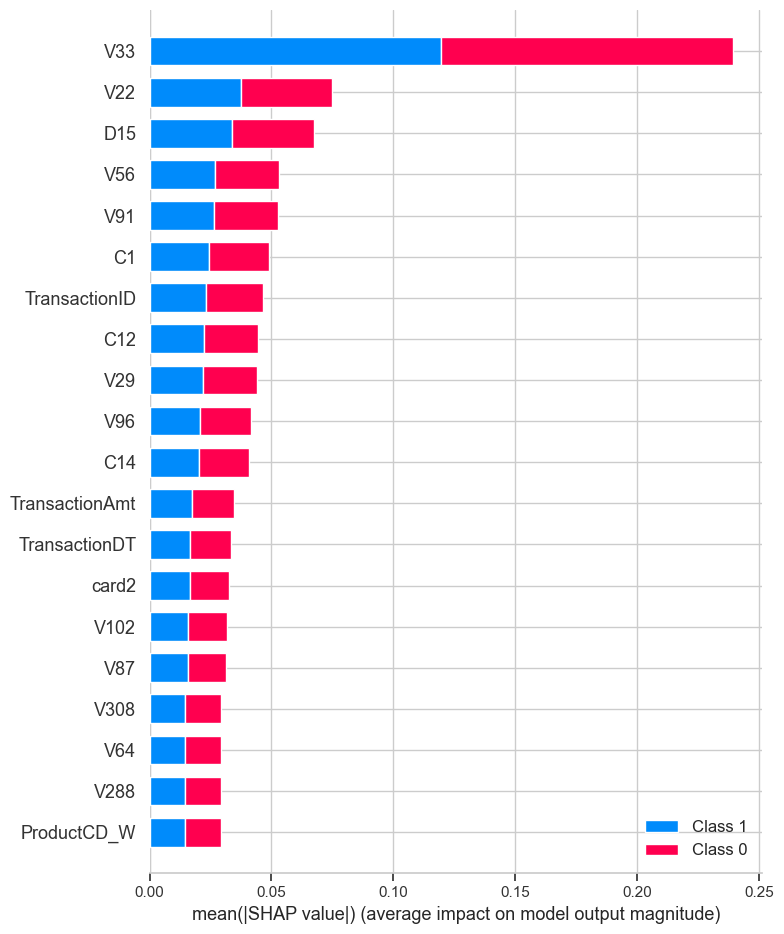

In [37]:
shap.initjs()
shap.summary_plot(shap_values, 
                  x_eai, plot_type="bar")

# Build Random Forest Model

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [39]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [40]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [41]:
rf_Model = RandomForestClassifier()

In [42]:
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [43]:
rf_Grid.fit(xTrain, yTrain)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [44]:
best_params = rf_Grid.best_params_
best_rf_model = rf_Grid.best_estimator_

In [45]:
#creating an explainer for our model

explainer1 = shap.TreeExplainer(best_rf_model)

In [46]:
#Finding the shap values using the explainer

shap_values1 = explainer1.shap_values(x_eai)
print(shap_values)

[array([[-0.03810679,  0.00904487, -0.07065576, ...,  0.00891157,
         0.00268333,  0.        ],
       [ 0.00823782,  0.0050262 ,  0.01155465, ...,  0.00252304,
         0.00240625,  0.        ],
       [ 0.00960283, -0.01569132,  0.05029114, ...,  0.00583894,
         0.00292721,  0.        ],
       ...,
       [ 0.0437803 ,  0.00555393,  0.01635334, ..., -0.00638648,
        -0.00125696,  0.        ],
       [-0.00415732, -0.00241247, -0.00373503, ...,  0.0017984 ,
         0.00286404,  0.        ],
       [-0.00404732,  0.02704773,  0.01258222, ...,  0.07471391,
         0.00356827,  0.        ]]), array([[ 0.03810679, -0.00904487,  0.07065576, ..., -0.00891157,
        -0.00268333,  0.        ],
       [-0.00823782, -0.0050262 , -0.01155465, ..., -0.00252304,
        -0.00240625,  0.        ],
       [-0.00960283,  0.01569132, -0.05029114, ..., -0.00583894,
        -0.00292721,  0.        ],
       ...,
       [-0.0437803 , -0.00555393, -0.01635334, ...,  0.00638648,
        

In [47]:
""" Expected/ base/ reference value, this is the value that would be 
predicted if we didn't know any features of the current output 
"""

print('Expected value:', explainer1.expected_value )

Expected value: [0.49942932 0.50057068]


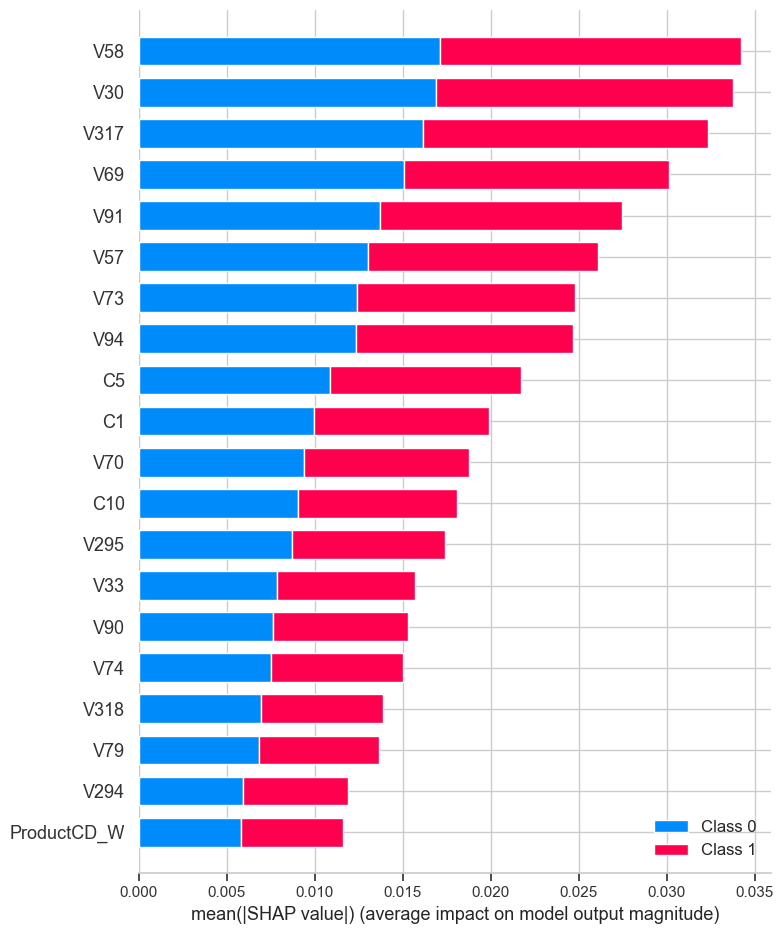

In [48]:
shap.initjs()
shap.summary_plot(shap_values1, 
                  x_eai, plot_type="bar")